In [187]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [188]:
%matplotlib inline

In [189]:
boxoffice = pd.read_csv('Boxofficemojo.csv') 
# Replace NaN with $0 million
boxoffice.production_budget = boxoffice.production_budget.replace(np.nan,'$0 million')
# Transfer '$100,000' string to '100000' 
boxoffice.production_budget[boxoffice.production_budget.str.find(',')!=-1]=\
    boxoffice.production_budget[boxoffice.production_budget.str.find(',')!=-1]\
    .str[1:].apply(lambda x: x.replace(',',''))
# Transfer '$n million' to 'n000000'
boxoffice.production_budget[boxoffice.production_budget.str.find('million')!=-1] = \
    boxoffice.production_budget[boxoffice.production_budget.str.find('million')!=-1].\
    str[1:].apply(lambda x: float(x.replace('million','').strip())*1e6).apply(str)
# Make the budget number to int
boxoffice.production_budget=boxoffice.production_budget.apply(float).apply(int)
# Many movies before 1990 only released in US, so set worldwide gross = domestic gross
boxoffice.worldwide[(boxoffice.worldwide=='ank') | (boxoffice.worldwide.isnull())] = boxoffice.domestic
boxoffice.worldwide = boxoffice.worldwide.apply(int)
boxoffice = boxoffice.sort_values('worldwide',ascending=False)
# Make sure no space in the "name" string
boxoffice.name = boxoffice.name.str.strip()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [190]:
num_budget = pd.read_csv('Thenumbers_copy.csv')
num_budget.name = num_budget.name.str.strip()
num_budget = num_budget.sort_values('worldwide',ascending=False)
num_budget.columns = ['domestic','name','production_budget_n','release_year','worldwide']

In [191]:
pd.set_option('display.max_rows', 101)

In [513]:
boxoffice.shape

,MPAArating,distributor,domestic,genre,name,production_budget,release_year,series,worldwide,Is_series
1614,PG-13,Fox,760507625,Sci-Fi Adventure,Avatar,237000000,2009,Series: Avatar,2787965087,True
1201,PG-13,Buena Vista,852736889,Action / Adventure,Avengers: Endgame,356000000,2019,Series: Avengers,2782336889,True
2800,PG-13,Paramount,659363944,Romance,Titanic,200000000,1997,No,2187463944,False
3311,PG-13,Buena Vista,936662225,Sci-Fi Fantasy,Star Wars: The Force Awakens,245000000,2015,Series: Star Wars,2068223624,True
1299,PG-13,Buena Vista,678815482,Action / Adventure,Avengers: Infinity War,0,2018,Series: Avengers,2048359754,True


In [193]:
#boxoffice.groupby('release_year').count().name #= boxoffice[['release_year','series']]

Text(0, 0.5, 'Number')

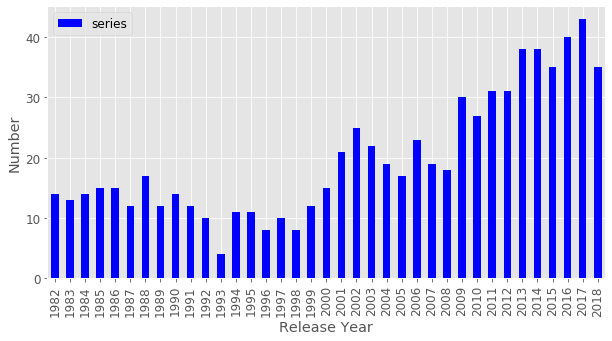

In [194]:
#Numbers of Series per year
plt.rcParams.update({'font.size': 12,'figure.figsize':(10,5)})
Series_per_year = boxoffice[['release_year','series']].loc[boxoffice.release_year!=2019]
Series_per_year = Series_per_year.loc[Series_per_year.series!='No',:].groupby('release_year')
Series_per_year.count().plot.bar(color='b')#,figsize=(12,8))
plt.xlabel('Release Year')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

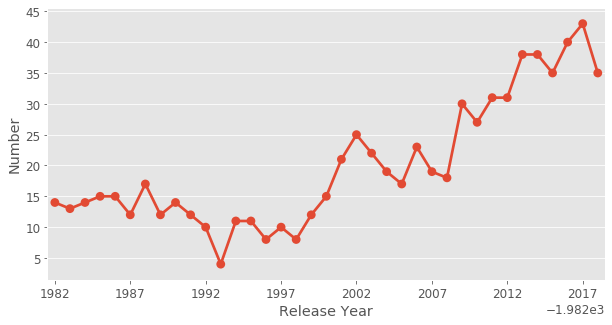

In [446]:
import matplotlib.ticker as ticker
ttt = Series_per_year.count().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x="release_year", y="series", data=ttt,xlim=(1980,2020))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(-1982))
plt.xlabel('Release Year')
plt.ylabel('Number')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0, 0.5, 'log_10(Worldwide Gross)')

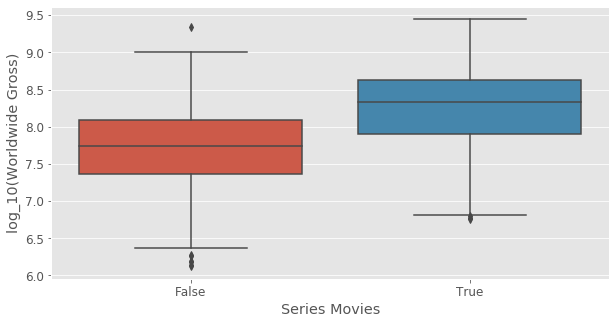

In [448]:
import seaborn as sns
boxoffice['Is_series'] = boxoffice.series!='No'
ser_vs_world = boxoffice[['Is_series', 'worldwide']]
ser_vs_world.worldwide = ser_vs_world.worldwide.apply(np.log10)
#ser_vs_world.boxplot(by='Is_series', column='worldwide',)
sns.boxplot(x='Is_series', y='worldwide', data=ser_vs_world)
plt.xlabel('Series Movies')
plt.ylabel('log_10(Worldwide Gross)')

In [457]:
print(stats.ttest_ind(ser_vs_world[ser_vs_world.Is_series == True].worldwide,\
                    ser_vs_world[ser_vs_world.Is_series == False].worldwide))
print(ser_vs_world[ser_vs_world.Is_series == True].shape)
print(ser_vs_world[ser_vs_world.Is_series != True].shape)
a = ser_vs_world[ser_vs_world.Is_series != True][['worldwide']]
a.mean()

Ttest_indResult(statistic=26.3038220321246, pvalue=3.201507704954549e-140)
(762, 2)
(3035, 2)


worldwide    7.735876
dtype: float64

Text(0.5, 0, 'log_10(Worldwide Gross)')

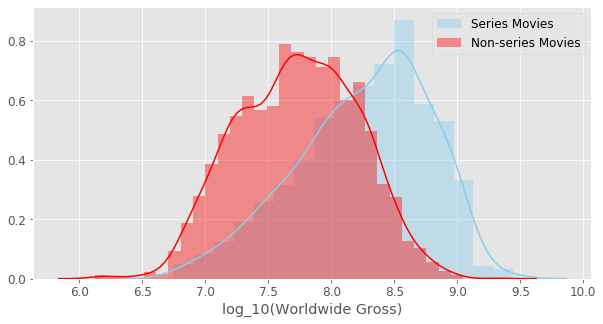

In [198]:
iss = ser_vs_world[ser_vs_world.Is_series == True]
isnos = ser_vs_world[ser_vs_world.Is_series == False]
sns.distplot(iss["worldwide"], kde = True, color="skyblue", label="Series Movies")
sns.distplot(isnos["worldwide"], kde = True, color="red", label="Non-series Movies")
plt.legend()
#plt.xlabel('Movie Series')
plt.xlabel('log_10(Worldwide Gross)')

Text(0, 0.5, 'Number of movies only released in US')

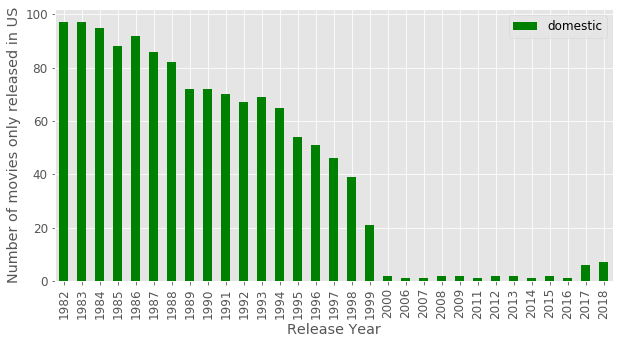

In [458]:
plt.rcParams.update({'font.size': 12,'figure.figsize':(10,5)})
domestic_movie = boxoffice.loc[boxoffice.worldwide == boxoffice.domestic].loc[boxoffice.release_year!=2019].groupby('release_year').count()
domestic_movie = domestic_movie.reset_index()
domestic_movie.plot(kind='bar',x='release_year', y='domestic',color = 'g')
plt.xlabel('Release Year')
plt.ylabel('Number of movies only released in US')

Text(0, 0.5, 'Total worldwide gross')

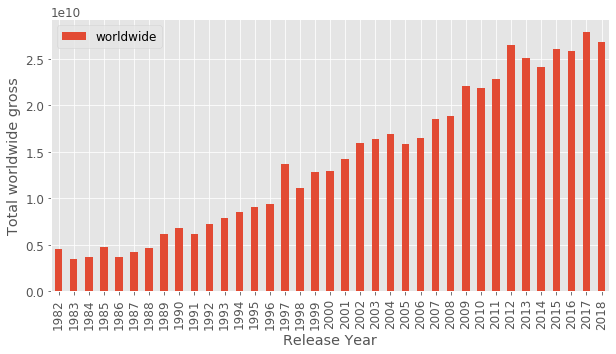

In [356]:
world_gross = boxoffice[['release_year','worldwide']].loc[boxoffice.release_year!=2019].groupby('release_year')
world_gross = world_gross.worldwide.sum().reset_index()
world_gross.plot(kind='bar',x='release_year', y='worldwide')
plt.xlabel('Release Year')
plt.ylabel('Total worldwide gross')

Text(0, 0.5, 'Total worldwide gross')

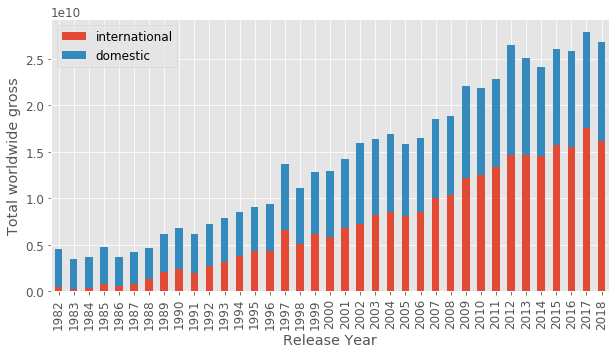

In [560]:
w_g2 = boxoffice[['release_year','worldwide','domestic']].loc[boxoffice.release_year!=2019]
w_g2['international']= w_g2.worldwide-w_g2.domestic
w_g2 = w_g2.drop('worldwide',1)
w_g2.groupby(['release_year'])[['international','domestic']].sum().plot(kind='bar', stacked=True)
plt.xlabel('Release Year')
plt.ylabel('Total worldwide gross')

In [ ]:
df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)
df.groupby(['NFF', 'ABUSE']).size().unstack().plot(kind='bar', stacked=True)

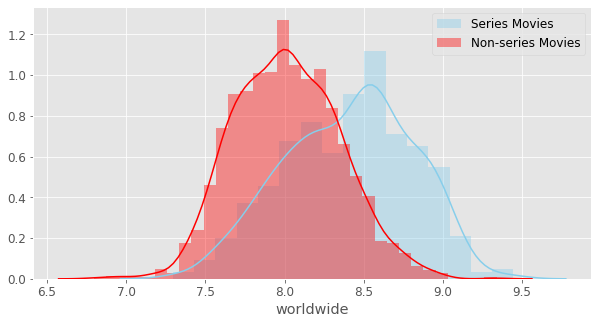

In [200]:
int_movie = boxoffice.loc[boxoffice.worldwide != boxoffice.domestic][['Is_series', 'worldwide']]
int_movie.worldwide = int_movie.worldwide.apply(np.log10)
iss_int = int_movie[int_movie.Is_series == True]
isnos_int = int_movie[int_movie.Is_series == False]
sns.distplot(iss_int["worldwide"], color="skyblue", label="Series Movies")
sns.distplot(isnos_int["worldwide"], color="red", label="Non-series Movies")
plt.legend()

In [201]:
print(stats.ttest_ind(int_movie[int_movie.Is_series == True].worldwide,\
                    int_movie[int_movie.Is_series == False].worldwide))
print(int_movie[int_movie.Is_series == True].shape)
print(int_movie[int_movie.Is_series != True].shape)

Ttest_indResult(statistic=24.029941090790132, pvalue=8.206547228540113e-115)
(639, 2)
(1827, 2)


In [207]:
# Merged table
name_pb = num_budget[['name','production_budget_n']]
name_pb.name = name_pb.name.str.strip()
# Left join boxoffice and name_pb, then sort the DF by release_year
Merged_df = pd.merge(boxoffice, name_pb, how='left', on ='name').sort_values('release_year',ascending=False)
# There are some NaN at column 'production_budget_n', and the values in that column are change to float type.
# So I use apply(int) to make the values integer.
Merged_df.production_budget_n = Merged_df.production_budget_n.replace(np.nan,0).apply(int)
# If the production_budget in boxoffice is zero, then replace it with the value from num_budget
Merged_df.loc[(Merged_df.production_budget ==0)&(Merged_df.production_budget_n!=0)].production_budget = \
test.loc[(Merged_df.production_budget ==0)&(Merged_df.production_budget_n!=0)].production_budget_n
# Drop production_budget_n column
Merged_df = Merged_df.drop('production_budget_n', 1)
# Only retain movies with not zero production_budget 
Merged_df = Merged_df.loc[Merged_df.production_budget != 0]

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [208]:
Merged_df['profit'] = (Merged_df.worldwide - Merged_df.production_budget)/Merged_df.production_budget

In [209]:
Merged_df.head()

,MPAArating,distributor,domestic,genre,name,production_budget,release_year,series,worldwide,Is_series,profit
3218,R,Pure Flix,18764780,Drama,Unplanned,6000000,2019,No,18764780,False,2.127463
3076,R,Lionsgate/Summit,21903748,Action,Hellboy (2019),50000000,2019,Series: Hellboy,21903748,True,-0.561925
3026,R,Paramount,16734082,Horror,Crawl,13500000,2019,No,23334474,False,0.728480
2894,PG,STX Entertainment,20150241,Animation,Uglydolls,45000000,2019,No,27530241,False,-0.388217
2866,R,United Artists Releasing,28600717,Horror,Child's Play (2019),10000000,2019,Series: Child's Play,28600717,True,1.860072


mean      4.294330
median    3.180890
std       3.567166
Name: profit, dtype: float64
mean      2.456193
median    1.567442
std       2.982067
Name: profit, dtype: float64


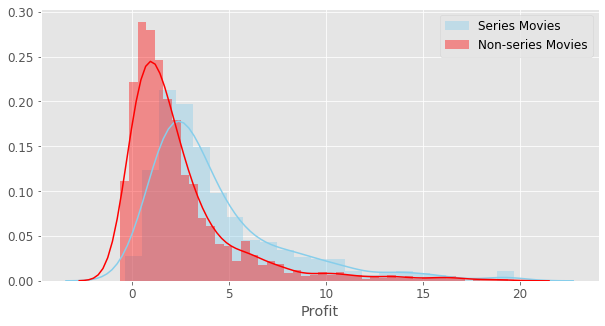

In [471]:
int_profit = Merged_df.loc[Merged_df.worldwide != Merged_df.domestic][['name','Is_series', 'profit','release_year']].sort_values('profit',ascending=False)
int_profit = int_profit.loc[int_profit.profit < 20]
iss_profit = int_profit[int_profit.Is_series == True]
isnos_profit = int_profit[int_profit.Is_series == False]
sns.distplot(iss_profit["profit"], color="skyblue", label="Series Movies")
sns.distplot(isnos_profit["profit"], color="red", label="Non-series Movies")
plt.legend()
#sns.boxplot(x='Is_series', y='profit', data=int_profit)
plt.xlabel('Profit')
#plt.ylabel('Profit')
print(iss_profit.profit.agg(['mean','median','std']))
print(isnos_profit.profit.agg(['mean','median','std']))

In [510]:
print(stats.ttest_ind(int_profit[int_profit.Is_series == True].profit,\
                    int_profit[int_profit.Is_series == False].profit))

Ttest_indResult(statistic=11.289642009615232, pvalue=1.2566244026357718e-28)


mean      5.327663
median    3.873597
std       4.603605
Name: first_profit, dtype: float64


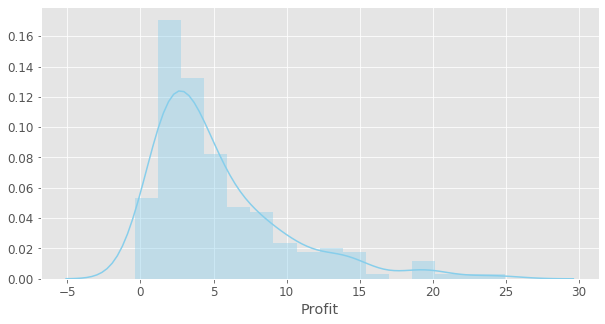

In [475]:
First_series = Merged_df.loc[(Merged_df.worldwide != Merged_df.domestic) & (Merged_df.series!= 'No')].sort_values('release_year').groupby('series')
a=[]
b=[]
for index, row in First_series:
    a.append(row.loc[row.release_year ==row.release_year.min()].profit)
for i in range(len(a)):
    b+=list(a[i].values)
df1 = pd.DataFrame(b,columns=['first_profit'])
df1 = df1.loc[df1.first_profit < 25]
sns.distplot(df1["first_profit"], color="skyblue", label="Series Movies")
plt.xlabel('Profit')
print(df1.first_profit.agg(['mean','median','std']))
#First_series.apply(lambda x: x.loc[release_year])
#dfg.apply(lambda x: x.loc[1:3])
#bar_df = df.groupby('title_year')[['budget']].mean().tail(10)
#bar_df.head(10)

In [501]:
df_genre = Merged_df.copy()
df_genre.genre = df_genre.genre.str.replace('/','').str.split()
df_genre.index = list(range(df_genre.shape[0]))

In [502]:
df_genre.sort_values('worldwide',ascending=False).head()

,MPAArating,distributor,domestic,genre,name,production_budget,release_year,series,worldwide,Is_series,profit
856,PG-13,Fox,760507625,"[Sci-Fi, Adventure]",Avatar,237000000,2009,Series: Avatar,2787965087,True,10.763566
32,PG-13,Buena Vista,852736889,"[Action, Adventure]",Avengers: Endgame,356000000,2019,Series: Avengers,2782336889,True,6.815553
1802,PG-13,Paramount,659363944,[Romance],Titanic,200000000,1997,No,2187463944,False,9.937320
344,PG-13,Buena Vista,936662225,"[Sci-Fi, Fantasy]",Star Wars: The Force Awakens,245000000,2015,Series: Star Wars,2068223624,True,7.441729
336,PG-13,Universal,652270625,"[Action, Adventure]",Jurassic World,150000000,2015,Series: Jurassic Park,1671713208,True,10.144755


In [503]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genre:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genre'])
genre.head(10)
#df_genre.genres

,index,genre
0,0,Drama
1,1,Action
2,2,Horror
3,3,Animation
4,4,Horror
5,5,Animation
6,6,Fantasy
7,7,Horror
8,8,Thriller
9,9,Family


In [504]:
df_genre = pd.merge(df_genre.drop('genre', axis=1), genre, how='right', left_index=True, right_on='index')
df_genre = df_genre.loc[(df_genre.genre != 'Unknown')]
df_genre.worldwide = df_genre.worldwide.apply(np.log10)

(3025, 12)


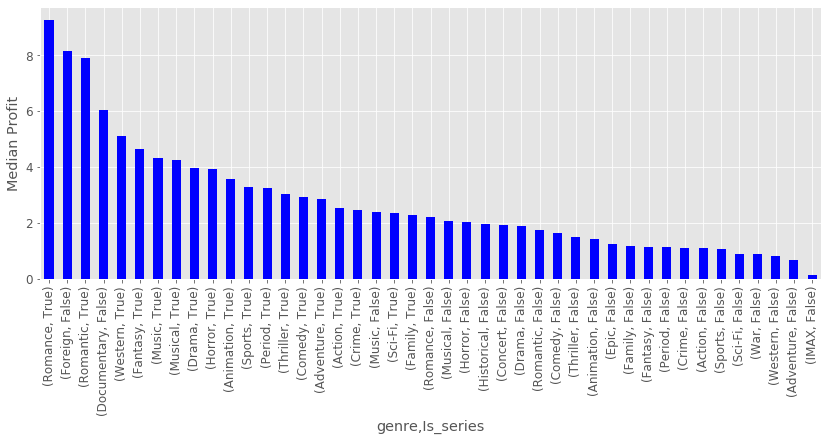

In [505]:
df_genre.groupby(['genre', 'Is_series'])['profit'].median().sort_values(ascending=False).plot.bar(color='b',figsize=[14,5])
plt.ylabel('Median Profit')
print(df_genre.shape)

(3025, 12)


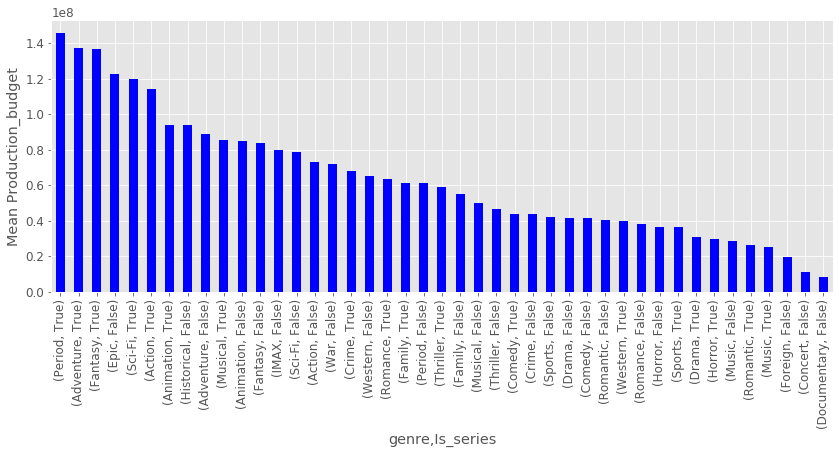

In [507]:
df_genre.groupby(['genre', 'Is_series'])['production_budget'].mean().sort_values(ascending=False).plot.bar(color='b',figsize=[14,5])
plt.ylabel('Mean Production_budget')
print(df_genre.shape)

In [512]:
df_genre[df_genre.genre == "Horror"]

,MPAArating,distributor,domestic,name,production_budget,release_year,series,worldwide,Is_series,profit,index,genre
2,R,Paramount,16734082,Crawl,13500000,2019,No,7.367998,False,0.728480,2,Horror
4,R,United Artists Releasing,28600717,Child's Play (2019),10000000,2019,Series: Child's Play,7.456377,True,1.860072,4,Horror
7,R,Sony / Screen Gems,17300439,Brightburn,6000000,2019,No,7.509626,False,4.388587,7,Horror
11,R,Orion Pictures,14856291,The Prodigy,6000000,2019,No,7.171910,False,1.476049,11,Horror
19,R,Paramount,54724696,Pet Sematary (2019),21000000,2019,No,8.050766,False,4.352378,16,Horror
20,R,Warner Bros. (New Line),54733739,The Curse of La Llorona,9000000,2019,No,8.086480,False,12.559304,17,Horror
40,PG-13,Universal,28051045,Happy Death Day 2U,9000000,2019,Series: Happy Death Day,7.808012,True,6.141170,34,Horror
51,PG-13,Universal,67745330,Insidious: The Last Key,10000000,2018,Series: Insidious,8.225013,True,15.788559,42,Horror
57,PG-13,Sony / Screen Gems,30569484,Slender Man,10000000,2018,No,7.713814,False,4.173855,47,Horror
67,PG-13,Paramount,188024361,A Quiet Place,17000000,2018,Series: A Quiet Place,8.532677,True,19.055257,55,Horror


In [445]:

for i in First_series:
    print(i[0])
    print(i[1])

Series: 300
    MPAArating   distributor   domestic          genre  \
245          R  Warner Bros.  210614939  Period Action   
398          R  Warner Bros.  106580051  Period Action   

                       name  production_budget  release_year       series  \
245                     300           65000000          2007  Series: 300   
398  300: Rise of An Empire          110000000          2014  Series: 300   

     worldwide  Is_series    profit  
245  456068181       True  6.016434  
398  337580051       True  2.068910  
Series: A Dog's Franchise
    MPAArating distributor  domestic           genre             name  \
760         PG   Universal  64508620  Comedy / Drama  A Dog's Purpose   

     production_budget  release_year                     series  worldwide  \
760           22000000          2017  Series: A Dog's Franchise  205035819   

     Is_series   profit  
760       True  8.31981  
Series: A Haunted House
     MPAArating      distributor  domestic   genre           

    MPAArating      distributor   domestic     genre  \
648          R  Sony / Columbia  102515793  Thriller   

                                       name  production_budget  release_year  \
648  The Girl with the Dragon Tattoo (2011)           90000000          2011   

                    series  worldwide  Is_series    profit  
648  Series: Dragon Tattoo  232617430       True  1.584638  
Series: Dumb and Dumber
     MPAArating distributor   domestic   genre  \
597       PG-13    New Line  127175374  Comedy   
2573      PG-13    New Line   26276465  Comedy   
943       PG-13   Universal   86208010  Comedy   

                                         name  production_budget  \
597                           Dumb and Dumber           17000000   
2573  Dumb and Dumberer: When Harry Met Lloyd           19000000   
943                        Dumb and Dumber To           40000000   

      release_year                   series  worldwide  Is_series     profit  
597           1994  Series:

    MPAArating distributor   domestic               genre  \
32       PG-13   Universal  402828120       Sci-Fi Horror   
146      PG-13   Universal  229086679       Sci-Fi Horror   
337      PG-13   Universal  181171875       Sci-Fi Horror   
5        PG-13   Universal  652270625  Action / Adventure   
12       PG-13   Universal  417719760  Action / Adventure   

                               name  production_budget  release_year  \
32                    Jurassic Park           63000000          1993   
146   The Lost World: Jurassic Park           73000000          1997   
337               Jurassic Park III           93000000          2001   
5                    Jurassic World          150000000          2015   
12   Jurassic World: Fallen Kingdom          170000000          2018   

                    series   worldwide  Is_series     profit  
32   Series: Jurassic Park  1029528120       True  15.341716  
146  Series: Jurassic Park   618638999       True   7.474507  
337  Series

     MPAArating     distributor  domestic   genre         name  \
1244          R  Orion Pictures  47212904  Action  First Blood   
820           R         TriStar  53715611  Action    Rambo III   
1358          R       Lionsgate  42754105  Action        Rambo   

      production_budget  release_year         series  worldwide  Is_series  \
1244           15000000          1982  Series: Rambo  125212904       True   
820            63000000          1988  Series: Rambo  189015611       True   
1358           50000000          2008  Series: Rambo  113244290       True   

        profit  
1244  7.347527  
820   2.000248  
1358  1.264886  
Series: Red
     MPAArating           distributor  domestic          genre   name  \
785       PG-13  Summit Entertainment  90380162  Action Comedy    Red   
1085      PG-13      Lionsgate/Summit  53262560  Action Comedy  Red 2   

      production_budget  release_year       series  worldwide  Is_series  \
785            58000000          2010  Series:

    MPAArating distributor   domestic   genre                      name  \
751      PG-13   Universal  144533925  Action  The Fast and the Furious   
636      PG-13   Universal  127154901  Action          2 Fast 2 Furious   
347      PG-13   Universal  155064265  Action          Fast and Furious   
138      PG-13   Universal  209837675  Action                 Fast Five   
86       PG-13   Universal  238679850  Action          Fast & Furious 6   
7        PG-13   Universal  353007020  Action                 Furious 7   
16       PG-13   Universal  226008385  Action   The Fate of the Furious   

     production_budget  release_year                            series  \
751           38000000          2001  Series: The Fast and the Furious   
636           76000000          2003  Series: The Fast and the Furious   
347           85000000          2009  Series: The Fast and the Furious   
138          125000000          2011  Series: The Fast and the Furious   
86           160000000       